# Create a good figure for comparing CMFGen models to Python Models

In [1]:
import os
os.getcwd()

'/Users/long/Projects/Python/release-models/Details/cmfgen/plots'

In [2]:
import matplotlib.pyplot as plt
from scipy.signal import boxcar
from scipy.signal import convolve
import numpy as np
from astropy.io import ascii

In [3]:
python_output_dir='../python/Results/'

In [4]:
a3=ascii.read('../cmfgen/a3.spec.txt')
a3.info()
smooth=201
a3['smooth']=convolve(a3['nuFnu'],boxcar(smooth)/float(smooth),mode='same')


<Table length=233565>
 name  dtype 
----- -------
 Freq float64
 Wave float64
nuFnu float64


/var/folders/tq/5yb4qm590qxbk0ykb4ft0nyc000401/T/ipykernel_31520/3320246103.py:4: DeprecationWarning: Importing boxcar from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.boxcar' or the convenience function 'scipy.signal.get_window' instead.
  a3['smooth']=convolve(a3['nuFnu'],boxcar(smooth)/float(smooth),mode='same')


In [5]:
def singlet(name=r'Ly$\alpha',wavelength=1216,bot=0.8,top=0.9):
    limits=plt.axis()
    # print(limits)
    if limits[0]<wavelength and wavelength<limits[1]:
        dy=limits[3]-limits[2]
        xbot=limits[2]+bot*dy
        xtop=limits[2]+top*dy
        plt.plot([wavelength,wavelength],[xbot,xtop],'k')
        # print(xbot,xtop)
        plt.text(wavelength,xtop,name,va='bottom',ha='center')
        
def doublet(name='PV',w1=1118,w2=1128,bot=0.8,top=0.9):
    limits=plt.axis()
    # print(limits)
    if limits[0]<w1 and w2<limits[1]:
        dy=limits[3]-limits[2]
        xbot=limits[2]+bot*dy
        xtop=limits[2]+top*dy
        plt.plot([w1,w1],[xbot,xtop],'k')
        plt.plot([w2,w2],[xbot,xtop],'k')
        # print(xbot,xtop)
        plt.text(0.5*(w1+w2),xtop,name,va='bottom',ha='center')
        
def add_lines():
    singlet(name=r'Ly$\alpha$',wavelength=1215.33,bot=0.8,top=0.9)
    singlet(name=r'Ly$\beta$',wavelength=1025.4,bot=0.8,top=0.9)
    singlet(name=r'Ly$\gamma$',wavelength=972.27,bot=0.8,top=0.85)
    singlet(name=r'Ly$\delta$',wavelength=949.48,bot=0.8,top=0.9)
    singlet(name=r'CIV',wavelength=1549,bot=0.8,top=0.9)
    singlet(name=r'CIII',wavelength=977.02008,bot=0.8,top=0.9)
    singlet(name=r'NIII',wavelength=989.7990118,bot=0.8,top=0.95)
    singlet(name=r'CIII$^{*}$',wavelength=1175,bot=0.8,top=0.9)
    singlet(name=r'NIV$^{*}$',wavelength=1718,bot=0.8,top=0.9)
    singlet(name=r'HeII',wavelength=1640,bot=0.8,top=0.9)
    singlet(name=r'NIV$^{*}$',wavelength=923,bot=0.8,top=0.9)
    singlet(name=r'OV$^{*}$',wavelength=1371.3,bot=0.8,top=0.9)
    singlet(name=r'NIV$^{*}$',wavelength=955.334,bot=0.7,top=0.75)
    
    
    doublet(name='PV',w1=1118,w2=1128,bot=0.8,top=0.9)
    doublet(name='NV',w1=1238.8,w2=1242.8,bot=0.8,top=0.9)
    doublet(name='SiIV',w1=1393.7,w2=1402.7,bot=0.8,top=0.9)
    doublet(name='SVI',w1=933.38,w2=945.55,bot=0.8,top=.85)
    doublet(name='OVI',w1=1031.9,w2=1037.6,bot=0.8,top=.85)
    doublet(name='SIV',w1=1062.6,w2=1076,bot=0.8,top=.85)
    
    
    

In [6]:
def plot_it(root='../python/a3',wmin=850,wmax=1850,smooth=21,cmfgen=a3):
    '''
    Multi-panel plot comparing a CMFGen and Python model
    in the UV
    '''
    star=ascii.read(root+'.spec')
    star['nuFnu']=star['Lambda']*star['A45P0.50']
    star_nufnu=convolve(star['nuFnu'],boxcar(smooth)/float(smooth),mode='same')
    
    plt.figure(1,(8,12))
    
    
    plt.subplot(311)

    plt.plot(star['Lambda'],star_nufnu,label='Python')
    plt.plot(cmfgen['Wave'],cmfgen['smooth'],label='CMFGen')
    plt.legend(loc='best')
    plt.xlim(850,1200)
    # plt.ylabel(r'$\nu F_{\nu}$ (ergs cm$^{-1}$s$^{-1}$)')
    # plt.xlabel(r'Wavelength ($\AA$)')
    add_lines()
    
    plt.subplot(312)

    plt.plot(star['Lambda'],star_nufnu,label='Python')
    plt.plot(cmfgen['Wave'],cmfgen['smooth'],label='CMFGen')
    plt.legend(loc='best')
    plt.xlim(1150,1500)
    plt.ylabel(r'$\nu F_{\nu}$ (ergs cm$^{-1}$s$^{-1}$)',size=16)
    # plt.xlabel(r'Wavelength ($\AA$)')
    add_lines()
    
    plt.subplot(313)

    plt.plot(star['Lambda'],star_nufnu,label='Python')
    plt.plot(cmfgen['Wave'],cmfgen['smooth'],label='CMFGen')
    plt.legend(loc='best')
    plt.xlim(1450,1800)
    # plt.ylabel(r'$\nu F_{\nu}$ (ergs cm$^{-1}$s$^{-1}$)')
    plt.xlabel(r'Wavelength ($\AA$)',size=16)
    add_lines()
    
    plt.savefig(root+'.compare.png')
    return
    




/var/folders/tq/5yb4qm590qxbk0ykb4ft0nyc000401/T/ipykernel_31520/3921456088.py:8: DeprecationWarning: Importing boxcar from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.boxcar' or the convenience function 'scipy.signal.get_window' instead.
  star_nufnu=convolve(star['nuFnu'],boxcar(smooth)/float(smooth),mode='same')


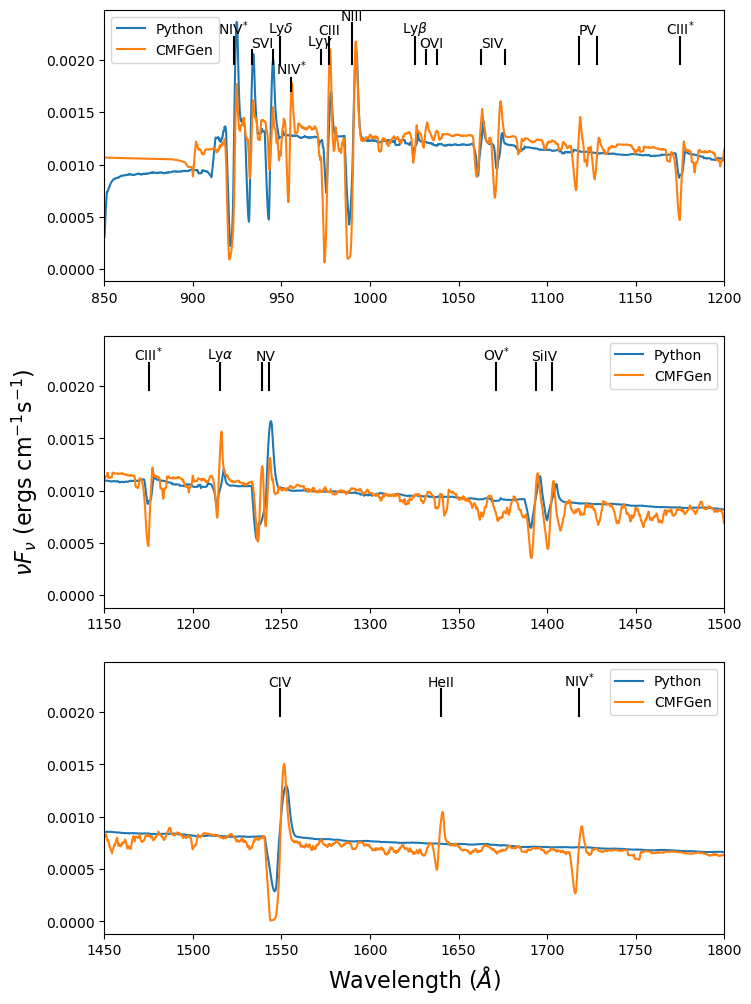

In [7]:
xdir='%s/%s' % (python_output_dir,'a3')
plot_it(xdir)

/var/folders/tq/5yb4qm590qxbk0ykb4ft0nyc000401/T/ipykernel_31520/3921456088.py:8: DeprecationWarning: Importing boxcar from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.boxcar' or the convenience function 'scipy.signal.get_window' instead.
  star_nufnu=convolve(star['nuFnu'],boxcar(smooth)/float(smooth),mode='same')


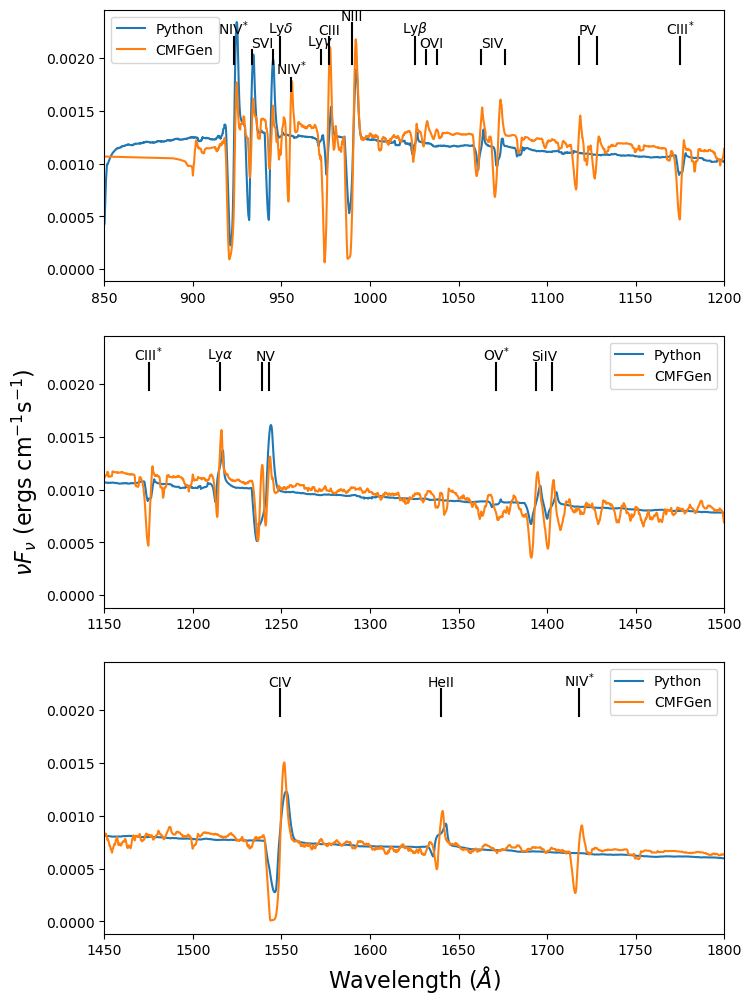

In [8]:
xdir='%s/%s' % (python_output_dir,'a3_hhe')
plot_it(xdir)

/var/folders/tq/5yb4qm590qxbk0ykb4ft0nyc000401/T/ipykernel_31520/3921456088.py:8: DeprecationWarning: Importing boxcar from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.boxcar' or the convenience function 'scipy.signal.get_window' instead.
  star_nufnu=convolve(star['nuFnu'],boxcar(smooth)/float(smooth),mode='same')


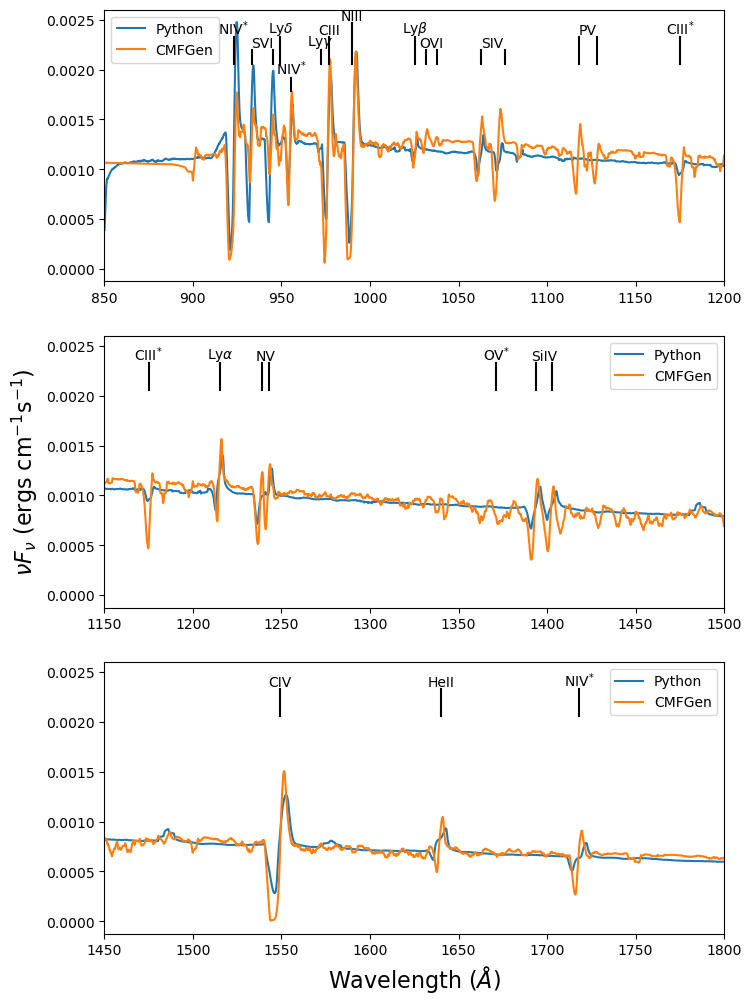

In [9]:
xdir='%s/%s' % (python_output_dir,'a3_cno')
plot_it(xdir)